# Numpy数据加载

In [1]:
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds

In [2]:
# 使用numpy load方法加载数据到内存中
DATA_URL = 'https://storage.googleapis.com/tensorflow/tf-keras-datasets/mnist.npz'

path = tf.keras.utils.get_file('mnist.npz', DATA_URL)
with np.load(path) as data:
  train_examples = data['x_train']
  train_labels = data['y_train']
  test_examples = data['x_test']
  test_labels = data['y_test']

In [5]:
# 1 使用特征和标签构建数据集。返回一个包含特征和标签的二元组。
train_dataset = tf.data.Dataset.from_tensor_slices((train_examples, train_labels))
test_dataset = tf.data.Dataset.from_tensor_slices((test_examples, test_labels))

In [6]:
# 2 对数据进行处理，转换为TensorFlow tensor格式，打乱数据。
BATCH_SIZE = 64
SHUFFLE_BUFFER_SIZE = 100

train_dataset = train_dataset.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE)
test_dataset = test_dataset.batch(BATCH_SIZE)

In [7]:
# 3 建立、训练模型
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.RMSprop(),
                loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                metrics=[tf.keras.metrics.SparseCategoricalAccuracy()])

In [8]:
model.fit(train_dataset, epochs=10)


Epoch 1/10
938/938 [==============================] - 2s 1ms/step - loss: 7.9543 - sparse_categorical_accuracy: 0.8307
Epoch 2/10
938/938 [==============================] - 1s 1ms/step - loss: 0.5852 - sparse_categorical_accuracy: 0.9190
Epoch 3/10
938/938 [==============================] - 1s 1ms/step - loss: 0.4207 - sparse_categorical_accuracy: 0.9422
Epoch 4/10
938/938 [==============================] - 1s 2ms/step - loss: 0.3270 - sparse_categorical_accuracy: 0.9520
Epoch 5/10
938/938 [==============================] - 1s 1ms/step - loss: 0.3077 - sparse_categorical_accuracy: 0.9579
Epoch 6/10
938/938 [==============================] - 1s 1ms/step - loss: 0.2742 - sparse_categorical_accuracy: 0.9629
Epoch 7/10
938/938 [==============================] - 1s 1ms/step - loss: 0.2429 - sparse_categorical_accuracy: 0.9662
Epoch 8/10
938/938 [==============================] - 1s 1ms/step - loss: 0.2418 - sparse_categorical_accuracy: 0.9692
Epoch 9/10
938/938 [============================

In [9]:
# 4 评估模型
model.evaluate(test_dataset)

157/157 [==============================] - 0s 806us/step - loss: 0.6439 - sparse_categorical_accuracy: 0.9527


[0.64388507604599, 0.9527000188827515]

# Pandas数据加载

In [36]:
import pandas as pd
import tensorflow as tf

In [37]:
# 使用pandas将数据加载到内存中
df = pd.read_csv("simple.csv")
df.head()

,ACCESS_PERSONAL_INFO___,ALTER_PHONE_STATE___,ANTI_DEBUG_____,CREATE_FOLDER_____,CREATE_PROCESS`_____,CREATE_THREAD_____,DEVICE_ACCESS_____,EXECUTE_____,FS_ACCESS____,FS_ACCESS()____,...,utimes,vfork,vibrate,vibratePattern,wait4,watchRotation,windowGainedFocus,write,writev,Class
0,1,0,0,3,0,14,2,0,3,0,...,0,0,0,0,0,0,0,37,10,1
1,3,0,0,6,0,42,91,0,32,0,...,0,0,0,0,0,0,2,2838,46,1
2,2,0,0,4,0,23,3,0,17,2,...,0,0,0,0,0,0,1,111,20,1
3,1,0,0,4,0,27,9,0,36,0,...,0,0,0,0,0,0,7,987,197,1
4,3,0,0,11,0,18,3,0,16,0,...,0,0,0,0,0,0,1,98,25,1


In [32]:
# 使用pandas对数据进行预处理
print(df.dtypes)
# 一下pd的方法能够将字符串分类转换为离散值。
# df['thal'] = pd.Categorical(df['thal'])
# df['thal'] = df.thal.cat.codes

# 分离target
target = df.pop('Class')

ACCESS_PERSONAL_INFO___    int64
ALTER_PHONE_STATE___       int64
ANTI_DEBUG_____            int64
CREATE_FOLDER_____         int64
CREATE_PROCESS`_____       int64
                           ...  
watchRotation              int64
windowGainedFocus          int64
write                      int64
writev                     int64
Class                      int64
Length: 471, dtype: object


In [39]:
target = target -1
pd.value_counts(target)

2    3904
3    2546
1    2100
4    1795
0    1253
Name: Class, dtype: int64

In [40]:
# 2 对数据进行预处理，转换为tensor格式，并将数据打乱
dataset = tf.data.Dataset.from_tensor_slices((df.values, target.values))
train_dataset = dataset.shuffle(len(df)).batch(30)

In [41]:
def get_compiled_model():
  model = tf.keras.Sequential([
    tf.keras.layers.Dense(30, activation='relu'),
    tf.keras.layers.Dense(30, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax')
  ])

  model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
  return model

In [44]:
model = get_compiled_model()
history = model.fit(train_dataset, epochs=60)

Epoch 1/60
387/387 [==============================] - 1s 2ms/step - loss: 187.0325 - accuracy: 0.3329
Epoch 2/60
387/387 [==============================] - 0s 1ms/step - loss: 28.8425 - accuracy: 0.5551
Epoch 3/60
387/387 [==============================] - 0s 974us/step - loss: 21.2315 - accuracy: 0.6412
Epoch 4/60
387/387 [==============================] - 0s 894us/step - loss: 18.4994 - accuracy: 0.6447
Epoch 5/60
387/387 [==============================] - 0s 917us/step - loss: 15.1458 - accuracy: 0.6580
Epoch 6/60
387/387 [==============================] - 0s 827us/step - loss: 9.8803 - accuracy: 0.6890
Epoch 7/60
387/387 [==============================] - 0s 811us/step - loss: 11.3836 - accuracy: 0.6972
Epoch 8/60
387/387 [==============================] - 0s 752us/step - loss: 7.3741 - accuracy: 0.6984
Epoch 9/60
387/387 [==============================] - 0s 783us/step - loss: 5.9109 - accuracy: 0.7098
Epoch 10/60
387/387 [==============================] - 0s 902us/step - loss: 5.

In [47]:
history_dict = history.history
print(history_dict.keys())

dict_keys(['loss', 'accuracy'])


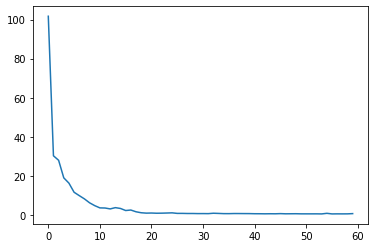

In [49]:
import matplotlib.pyplot as plt 
plt.plot(history_dict['loss'])

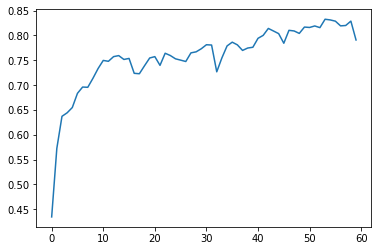

In [50]:
plt.plot(history_dict['accuracy'])